In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "/content/Retail-Supply-Chain-Sales-Dataset[1].xlsx"
data = pd.ExcelFile(file_path)

# Load the "Retails Order Full Dataset" sheet
retail_data = data.parse("Retails Order Full Dataset")

# Select relevant columns for clustering
features = ["Sales", "Profit", "Quantity", "Discount"]

# Drop rows with missing values in the selected columns
cleaned_data = retail_data[features].dropna()

# Standardize the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

# Display the first few rows of the cleaned data
cleaned_data.head()


,Sales,Profit,Quantity,Discount
0,261.9600,41.9136,2,0.00
1,731.9400,219.5820,3,0.00
2,14.6200,6.8714,2,0.00
3,957.5775,-383.0310,5,0.45
4,22.3680,2.5164,2,0.20


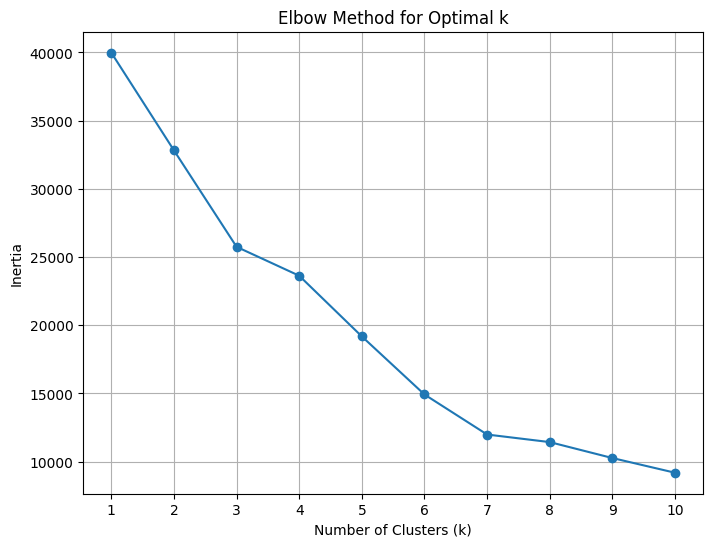

In [8]:
# Load the Excel file
file_path = "/content/Retail-Supply-Chain-Sales-Dataset[1].xlsx"
data = pd.ExcelFile(file_path)

# Load the "Retails Order Full Dataset" sheet
retail_data = data.parse("Retails Order Full Dataset")

# Select relevant columns for clustering
features = ["Sales", "Profit", "Quantity", "Discount"]

# Drop rows with missing values
cleaned_data = retail_data[features].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid()
plt.show()




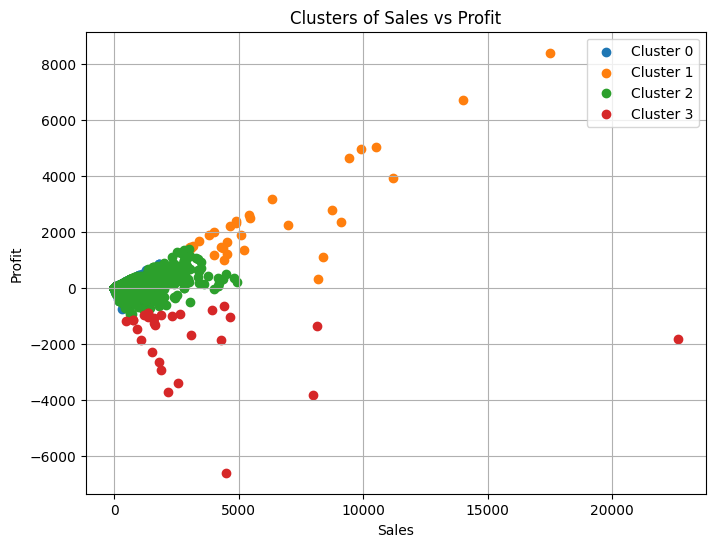

In [9]:
# Apply K-Means clustering with the selected k
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the data
cleaned_data["Cluster"] = clusters

# Visualize the clusters using a scatterplot (e.g., Sales vs Profit)
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = cleaned_data[cleaned_data["Cluster"] == cluster]
    plt.scatter(cluster_data["Sales"], cluster_data["Profit"], label=f"Cluster {cluster}")

plt.title("Clusters of Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.legend()
plt.grid()
plt.show()

In [10]:
# Add cluster labels to the original cleaned data
cleaned_data["Cluster"] = clusters

# Calculate the average of each feature for each cluster
cluster_averages = cleaned_data.groupby("Cluster").mean()

# Display the cluster averages
print(cluster_averages)


               Sales       Profit  Quantity  Discount
Cluster                                              
0         124.439315    14.337664  2.544343  0.155165
1        6423.002812  2508.018009  5.343750  0.043750
2         366.433292    51.037359  6.441335  0.155399
3        3259.930966 -1782.624648  5.965517  0.610345
